In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pygam import LinearGAM, s #, te

plt.style.use('aslak')

rhoi=917

rho_surf = 326.55 # from sunes linear fit. 

symlog = lambda x, thres: np.sign(x) * (np.log(1 + np.abs(x) / thres))
symexp = lambda y, thres: np.sign(y) * thres * (np.exp(y) - 1)
forward_transform = lambda rho: -symlog(rhoi-rho,1.0)
inverse_transform = lambda x: rhoi-symexp(-x,1.0)

def concave_fit(zp,rhop,z,rhos=None,n_splines=20):
    X = zp.ravel()
    y = rhop.ravel()
    weights= np.ones_like(y)
    if rhos: 
        X=np.append(0,X)
        y=np.append(rhos,y)
        weights=np.append(100.0,weights) # should this be a parameter
    mygam = LinearGAM(s(0, n_splines=n_splines,constraints='concave')).fit(X, y,weights=weights)
    #z = np.arange(np.min(zp),np.max(zp),dz)
    rho = mygam.predict(z)
    rho[z>np.max(zp)] = np.nan #do not extrapolate
    return rho

S5_BIAS_ADJUSTMENT = 1.04

Load all the different profiles


In [20]:
egsune = pd.read_csv('egrip/sune/egrip_density_iceeqdepth.txt',sep='\s+',comment='%',names=['z','rho'], usecols=[0,1])
egsune = egsune[egsune.z<120]


In [21]:
#this is from vas. I believe this is the same data that sune uses. 
eg = pd.read_csv('egrip/egrip_density.txt',sep='\s+',header=0,names=['z','rho'])
eg.sort_values(by='z',inplace=True)


In [22]:


s6 =  pd.read_excel('egrip/johannes_freitag/Density_EGRIP_S6_ExS5-1_ExS5-2.xlsx',header=0,names=['z','rho'],usecols=[0,1]).dropna()
s5_2 = pd.read_excel('egrip/johannes_freitag/Density_EGRIP_S6_ExS5-1_ExS5-2.xlsx',header=0,names=['z','rho'],usecols=[2,3]).dropna()
s5_1 = pd.read_excel('egrip/johannes_freitag/Density_EGRIP_S6_ExS5-1_ExS5-2.xlsx',header=0,names=['z','rho'],usecols=[4,5]).dropna()
s6.rho=s6.rho*1000
s5_1.rho=s5_1.rho*1000*S5_BIAS_ADJUSTMENT 
s5_2.rho=s5_2.rho*1000*S5_BIAS_ADJUSTMENT

s5_1.iloc[0]

z       12.50000
rho    525.49432
Name: 0, dtype: float64

In [23]:
#save all the profiles on this interval.
z= np.arange(0,100,1)*1.0
EGsmoothrho = concave_fit(eg.z.values,eg.rho.values,z)
S6smoothrho = concave_fit(s6.z.values,s6.rho.values,z)
#the s5 cores dont go to the surface. Make them go through rhos
S51smoothrho = concave_fit(s5_1.z.values,s5_1.rho.values,z,rho_surf)
S52smoothrho = concave_fit(s5_2.z.values,s5_2.rho.values,z,rho_surf)
EGsuneout = np.interp(z,egsune.z.values,egsune.rho.values)

df = pd.DataFrame({'z':z, 'EG': EGsmoothrho, 'S6': S6smoothrho, 'S5_1': S51smoothrho, 'S5_2': S52smoothrho, 'EG-sune': EGsuneout})

df.to_csv('egrip/smoothed_densityprofiles_AG.csv',index=False)

C:\Users\ag\AppData\Local\Temp\ipykernel_7620\2756707204.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(S6smoothrho,-z,'k-',color='c',label='S6-out',lw=1,alpha=0.5)


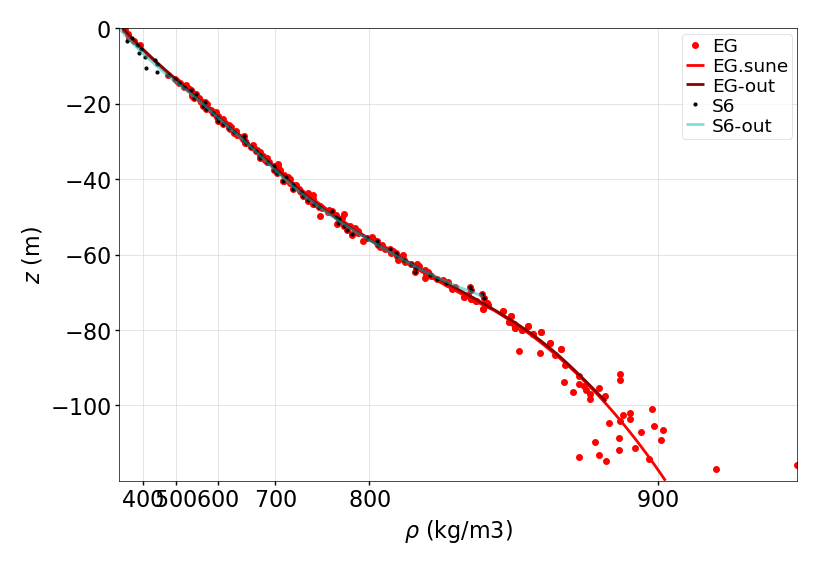

In [24]:
plt.plot(eg.rho,-eg.z,'r.',label='EG')
plt.plot(egsune.rho,-egsune.z,'r-',label='EG.sune',lw=1)
plt.plot(EGsmoothrho,-z,'-',color='darkred',label='EG-out',lw=1)
plt.plot(s6.rho,-s6.z,'k.',label='S6',ms=1)
plt.plot(S6smoothrho,-z,'k-',color='c',label='S6-out',lw=1,alpha=0.5)

#plt.plot(S51smoothrho,-zz,'-',color='b',label='s51-out',lw=1)
#plt.plot(S52smoothrho,-zz,'-',color='m',label='s52-out',lw=1)
#plt.plot(S6smoothrho,-zz,'-',color='c',label='S6-out',lw=1)

#plt.plot(s5_2.rho,-s5_2.z,'b.',lw=0.1,label='S5_2')
#plt.plot(s5_1.rho,-s5_1.z,'m.',lw=0.1,label='S5_1')



plt.xscale('function', functions=(forward_transform, inverse_transform))

plt.xlabel('$\\rho$ (kg/m3)')
plt.ylabel('$z$ (m)')
plt.legend()



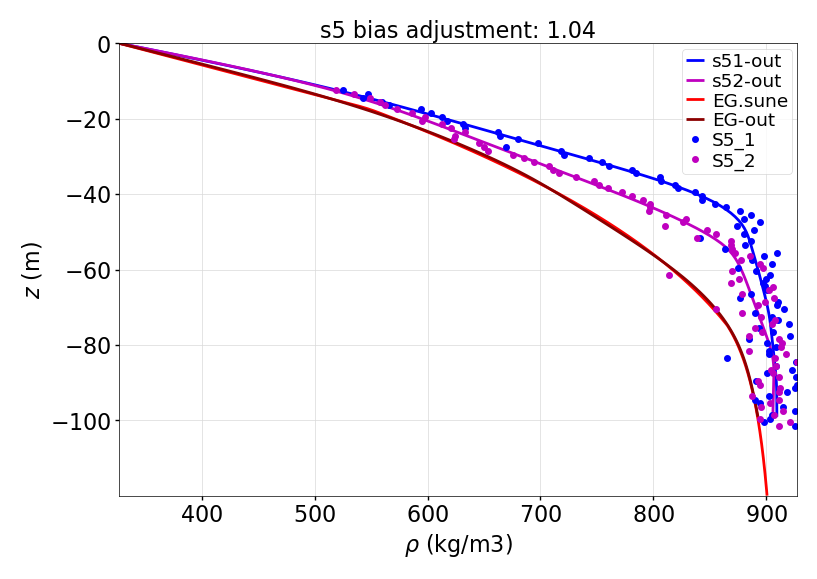

In [25]:
plt.plot(S51smoothrho,-z,'-',color='b',label='s51-out',lw=1)
plt.plot(S52smoothrho,-z,'-',color='m',label='s52-out',lw=1)
plt.plot(egsune.rho,-egsune.z,'r-',label='EG.sune',lw=1)
plt.plot(EGsmoothrho,-z,'-',color='darkred',label='EG-out',lw=1)

plt.plot(s5_1.rho,-s5_1.z,'b.',lw=0.1,label='S5_1')
plt.plot(s5_2.rho,-s5_2.z,'m.',lw=0.1,label='S5_2')



#plt.xscale('function', functions=(forward_transform, inverse_transform))

plt.xlabel('$\\rho$ (kg/m3)')
plt.ylabel('$z$ (m)')
plt.legend()
plt.title(f's5 bias adjustment: {S5_BIAS_ADJUSTMENT:.2f}');

In [26]:
510/917

0.5561613958560524

In [27]:
s5_1.iloc[0]

z       12.50000
rho    525.49432
Name: 0, dtype: float64